In [1]:
#bibliotecas básicas para manipulação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#bibliotecas para fase de pre-processamento
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
#bibliotecas de modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [4]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#bibliotecas auxiliares
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [6]:
train = pd.read_csv('/content/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [8]:
Passageiro = test[['PassengerId',	'HomePlanet']]
Passageiro

,PassengerId,HomePlanet
0,0013_01,Earth
1,0018_01,Earth
2,0019_01,Europa
3,0021_01,Europa
4,0023_01,Earth
...,...,...
4272,9266_02,Earth
4273,9269_01,Earth
4274,9271_01,Mars
4275,9273_01,Europa


In [9]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
#numéricas: age, RoomService,	FoodCourt,	ShoppingMall,	Spa,	VRDeck
#categóricas: HomePlanet,	CryoSleep,	Cabin,	Destination, VIP, Name
#alvo: Transported

In [12]:
nave = train.append(test, ignore_index=True)
nave

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [13]:
nave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [14]:
nave.shape

(12970, 14)

In [15]:
nulos = nave.isnull().sum()
print(nulos[nulos > 0])

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64


In [16]:
nave.duplicated().sum()

0

In [17]:
nave.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


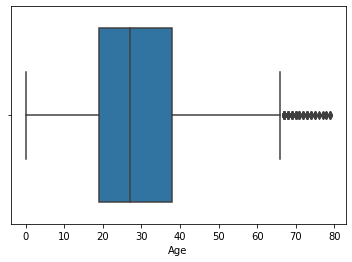

In [18]:
sns.boxplot(x = nave['Age'])

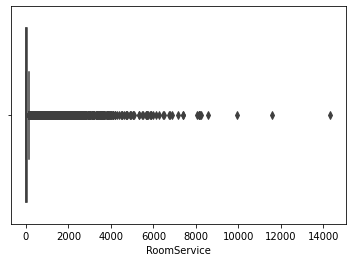

In [19]:
sns.boxplot(x = nave['RoomService'])

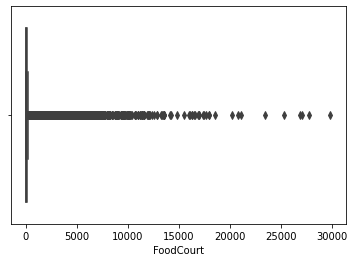

In [20]:
sns.boxplot(x = nave['FoodCourt'])

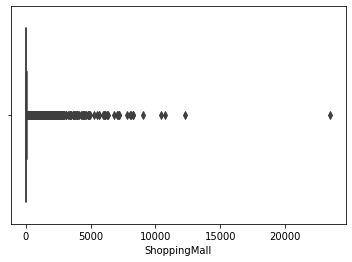

In [21]:
sns.boxplot(x = nave['ShoppingMall'])

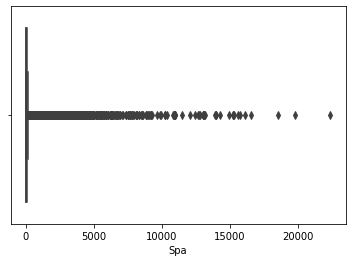

In [22]:
sns.boxplot(x = nave['Spa'])

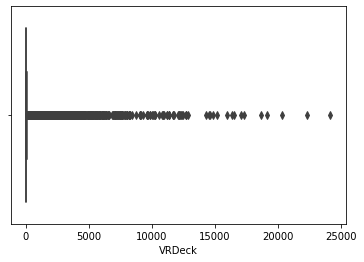

In [23]:
sns.boxplot(x = nave['VRDeck'])

# primeira função (RESUMO)

In [24]:
def resumo(df, coluna, count = True):
  print(f'Quantidade de valores únicos: {df[coluna].nunique()}')
  print(f'Valores únicos: {df[coluna].unique()}')
  print(f'Valores nulos: {df[coluna].isnull().sum()}')
  print(f'Valores únicos: \n{df[coluna].value_counts()}')
  #pallete = 'bright'

  if count == "True":
    sns.countplot(data = df, x = coluna, hue = 'Transported', palette = 'bright')
  else:
    sns.displot(data = df, x = coluna, hue = 'Transported', palette = 'bright')

Quantidade de valores únicos: 3
Valores únicos: ['Europa' 'Earth' 'Mars' nan]
Valores nulos: 288
Valores únicos: 
Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64


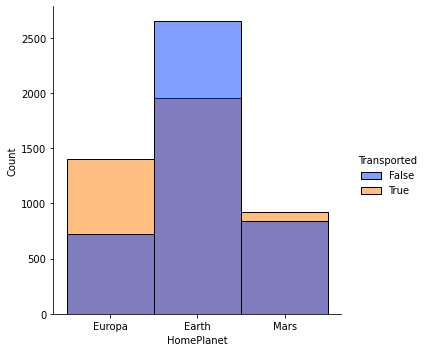

In [25]:
resumo(nave, 'HomePlanet')

In [26]:
#nota-se que, referente ao planeta de origem, muito mais gente saiu da terra do que de europa e marte
#ainda, verifica-se que a maioria dos que sairam da terra não foram transportados para a realidade paralela;
#enquanto isso, daqueles que tem europa como local de origem, nota-se que a maioria foi transportada.
# e para aqueles vindo de marte, a maioria foi transportada para outra realidade, sendo esse, os transportados, levemente acima da quantidade não trnasportada

#dito isso, Homeplanet parece ser uma variável relevante para predizer quem foi ou não transportando para uma realidade paralela

In [27]:
nave.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Quantidade de valores únicos: 2
Valores únicos: [ 0.  1. nan]
Valores nulos: 310
Valores únicos: 
0.0    8079
1.0    4581
Name: CryoSleep, dtype: int64


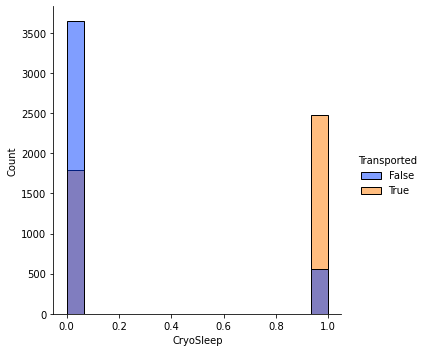

In [28]:
nave['CryoSleep']=nave['CryoSleep'].astype(np.float)
resumo(nave, 'CryoSleep', False)

In [29]:
conta1 = 8079 / (8079 + 4581)
conta1

0.6381516587677725

In [30]:
conta1nulo = 310 / (8079 + 4581)
conta1nulo

0.02448657187993681

In [31]:
#são 2 valores unicos correspondetes a 0 e 1 para sono criogênico
#além disso, existem 310 valores nulos (2%) e a distriuibção dos resultados ficaram em sua maioria para 0 (63%)
#em relação aos transportados, nota-se que 0 (não criogênico) a maioria não foi transportado apesar de ser um numero significante daqueles que foram
#já sobre os que tiveram sono criogênico, nota-se que a maioria esmagadora foram transportados.

#em posse dessas informações, é possivel verificar que é relevante para a predição a inclusão de cryosleep.

In [32]:
nave.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [33]:
#suspendi o gráfico de "Cabin" pq são muitas as respostas únicas e estava demorando para entregar o resultado
#Quantidade de valores únicos: 9825
#Valores úncis: ['B/0/P' 'F/0/S' 'A/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S']
#Valores nulos: 299

Quantidade de valores únicos: 3
Valores únicos: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Valores nulos: 274
Valores únicos: 
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64


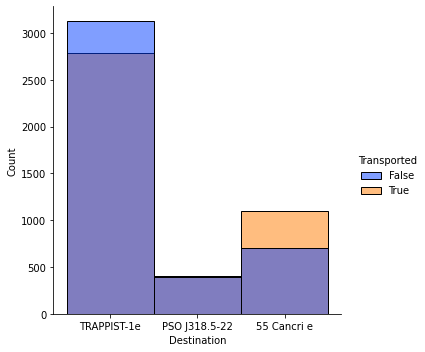

In [34]:
resumo(nave, 'Destination')

In [35]:
274 / (8871 + 2641 + 1184)

0.02158160050409578

In [36]:
8871 / (8871 + 2641 + 1184)

0.6987240075614367

In [37]:
2641 / (8871 + 2641 + 1184)

0.20801827347195967

In [38]:
#em destination, existem 3 valores unicos: 'TRAPPIST-1e', 'PSO J318.5-22' e '55 Cancri e'
#com valores unicos de 274 (2%)
#o mais frequente é "TRAPPIST-1e" com 69% das amostras; seguido por "55 cancri e" (20%)
#em TRAPPIST-1e, a maioria não foi transportada mas uma grande quantidade foi, para 'PSO J318.5-22', a divisão entre os que foram e os que não foram ficou praticamente igual
# e "55 cancri e" teve a maioria sendo transportada.

#Assim, lugar de destino pode ser uma das features

In [39]:
nave.loc[nave['Destination'] == 'TRAPPIST-1e']['Transported'].value_counts()

False    3128
True     2787
Name: Transported, dtype: int64

Quantidade de valores únicos: 80
Valores únicos: [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
Valores nulos: 270
Valores únicos: 
18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: Age, Length: 80, dtype: int64


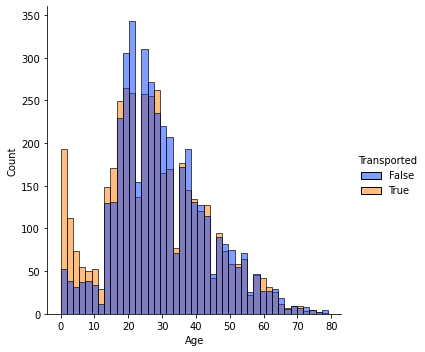

In [40]:
resumo(nave, 'Age')

In [41]:
#existem 80 valores únicos em age;
#sendo 270 valores nulos;
#o top 3 das idades mais frequentes são: 18, 24, 21.
#proporcionalmente falando, quanto menor a idade, maior a chance de ser transportado
#a partir dos 20 anos, tem-se um maior equilibrio entre os transportados e os não transportados, pendendo a favor dos não transportados

#seria usada como uma das features

Quantidade de valores únicos: 2
Valores únicos: [ 0.  1. nan]
Valores nulos: 296
Valores únicos: 
0.0    12401
1.0      273
Name: VIP, dtype: int64


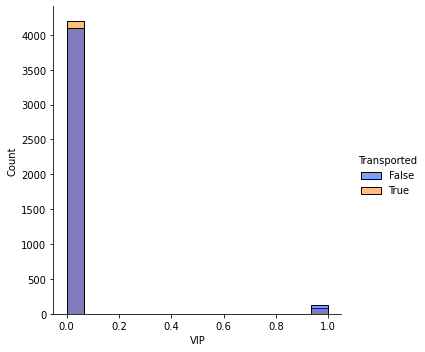

In [42]:
#TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
nave['VIP'] = nave['VIP'].astype(np.float32)
resumo(nave, "VIP")

In [43]:
12401/ (12401+273)

0.9784598390405554

In [44]:
# são 2 valores únicos: 0 e 1
#com 296 nulos
# em termos de resposta a maioria é False (97%)
#sobre os transportados, daqueles que não tinha o serviço vip, leve tendencia de transportados, e para aqueles que tinham o serviço vip, levemente a maioria foi de não transportado

Quantidade de valores únicos: 1578
Valores únicos: [   0.  109.   43. ... 1278. 2835.  652.]
Valores nulos: 263
Valores únicos: 
0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64


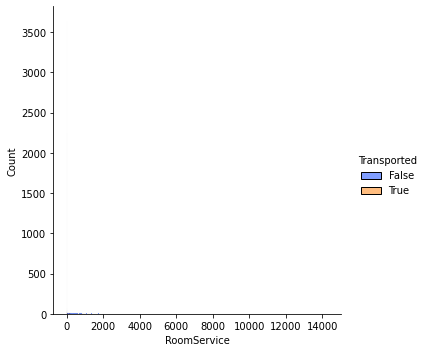

In [45]:
resumo(nave, 'RoomService', False)

In [46]:
#não consegui aplicar o gráfico.
#pelo fato de ser valores gastos com serviço de quarto, existem muitas entradas únicas.
#em relação aos valores nulos foi constatado 263.
#valor mais comum é zero.

#pensar se entra nas features ou se cria-se uma nova variável para englobar todos os gastos e despesas.

Quantidade de valores únicos: 1953
Valores únicos: [   0.    9. 3576. ...  873. 4813.  601.]
Valores nulos: 289
Valores únicos: 
0.0        8146
1.0         175
2.0         105
4.0          75
3.0          74
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: FoodCourt, Length: 1953, dtype: int64


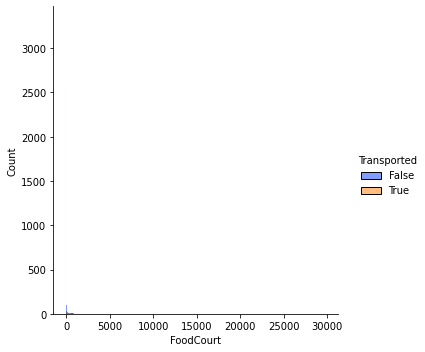

In [47]:
resumo(nave, 'FoodCourt')

In [48]:
#são ao todo 1953valores únicos referente gastos com praça de alimentação
#a maioria esmagadora não gastou nada.
#289 valores nulos
#não foi possivel imprimir o gráfico.

Quantidade de valores únicos: 1367
Valores únicos: [   0.   25.  371. ... 2156. 1258. 3851.]
Valores nulos: 306
Valores únicos: 
0.0       8331
1.0        225
2.0        112
3.0         94
4.0         69
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: ShoppingMall, Length: 1367, dtype: int64


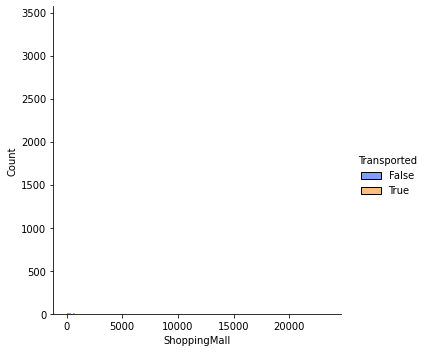

In [49]:
resumo(nave, 'ShoppingMall', False)

In [50]:
#são ao todo 1367 valores únicos
#com 306 nulos.
#valor único mais frequente é zero referente ao centro de compras
#não consegui reproduzir o gráfico.

Quantidade de valores únicos: 1679
Valores únicos: [   0.  549. 6715. ... 1872. 1716. 1812.]
Valores nulos: 284
Valores únicos: 
0.0       7935
1.0        218
2.0        148
3.0         82
4.0         73
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: Spa, Length: 1679, dtype: int64


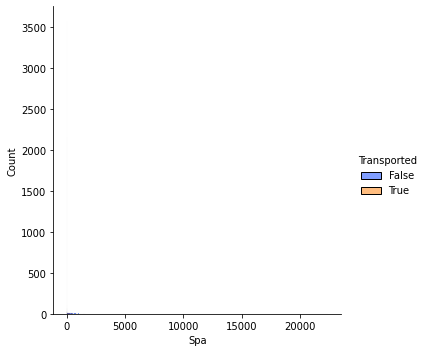

In [51]:
resumo(nave, 'Spa')

In [52]:
#são 1679
#com 284 valores nulos
#com valor único mais frequente sendo zero.

Quantidade de valores únicos: 1642
Valores únicos: [    0.    44.    49. ...  3093. 14834.   494.]
Valores nulos: 268
Valores únicos: 
0.0       8252
1.0        211
2.0        108
3.0         89
5.0         68
          ... 
395.0        1
3186.0       1
2519.0       1
1652.0       1
494.0        1
Name: VRDeck, Length: 1642, dtype: int64


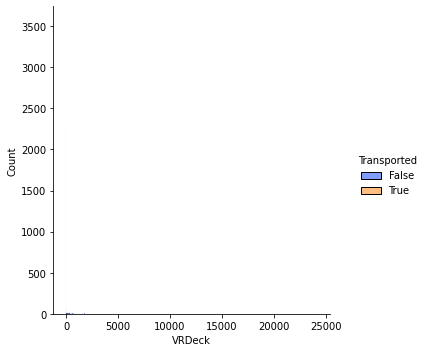

In [53]:
resumo(nave, 'VRDeck')

In [54]:
#em relação a localização dos quartos, existem 1642 valores únicos
#com 268 valores nulos
#a resposta mais comum foi de sem gastos em 8252 oportunidades

In [55]:
#coluna name não precisa de resumo

In [56]:
nave.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [57]:
#não tem mais colunas para fazer resumo.
#analisando as mesmas, nota-se pela necessidade inicial de incluir entre as features: homeplanet; cryoSleep; destination;age e vip
#em cabin, existem 3 informações relevantes que podem ser separadas em colunas individuais: convés, número e lado.
#existem colunas de despesas/gastos, talvez criar uma coluna somando tudo.

# Separando Passengerid em duas colunas, de grupo e individual

In [58]:
nave['PassengerId']

0        0001_01
1        0002_01
2        0003_01
3        0003_02
4        0004_01
          ...   
12965    9266_02
12966    9269_01
12967    9271_01
12968    9273_01
12969    9277_01
Name: PassengerId, Length: 12970, dtype: object

In [59]:
nave[['Grupo', 'Id']] = nave['PassengerId'].str.split('_', expand = True)

In [60]:
nave.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Id
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
5,0005_01,Earth,0.0,F/0/P,PSO J318.5-22,44.0,0.0,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,01
6,0006_01,Earth,0.0,F/2/S,TRAPPIST-1e,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,01
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,02
8,0007_01,Earth,0.0,F/3/S,TRAPPIST-1e,35.0,0.0,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007,01
9,0008_01,Europa,1.0,B/1/P,55 Cancri e,14.0,0.0,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,01


In [61]:
nave['Grupo'] = nave.groupby('Grupo')['PassengerId'].transform('nunique')

In [62]:
nave.drop('PassengerId', axis = 1, inplace = True)

In [63]:
nave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  float64
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  float32
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Transported   8693 non-null   object 
 13  Grupo         12970 non-null  int64  
 14  Id            12970 non-null  object 
dtypes: float32(1), float64(7), int64(1), object(6)
memory usage: 1.4+ MB


In [64]:
nave.drop('Id', axis = 1, inplace = True)

Quantidade de valores únicos: 8
Valores únicos: [1 2 3 6 4 7 5 8]
Valores nulos: 0
Valores únicos: 
1    7145
2    2590
3    1506
4     616
5     380
7     329
6     252
8     152
Name: Grupo, dtype: int64


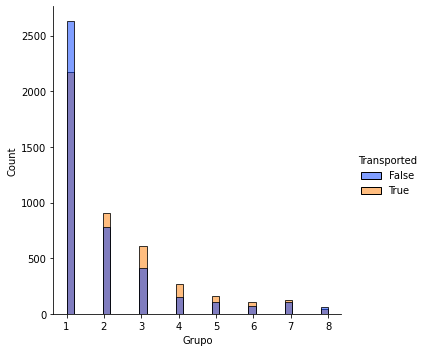

In [65]:
resumo(nave, 'Grupo')

# Separando "cabin" em outras 3 colunas

In [66]:
nave['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [67]:
nave[['Deck', 'Numero', 'Lado']] = nave['Cabin'].str.split('/', expand = True)
nave.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Deck,Numero,Lado
0,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,0,S
2,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,A,0,S
3,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,0,S
4,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,1,S


In [68]:
#foi usado o str.split, para dividir a coluna cabin
#além disso, o expand = true, tem como objetivo em transformar em colunas individuais, conforme documentação do pandas
#agora, é excluir cabin e aplicar as novas colunas no resumo.

In [69]:
nave.drop('Cabin', axis = 1, inplace = True)

In [70]:
nave.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Deck,Numero,Lado
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,0,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,A,0,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,0,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,1,S


Quantidade de valores únicos: 8
Valores únicos: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Valores nulos: 299
Valores únicos: 
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64


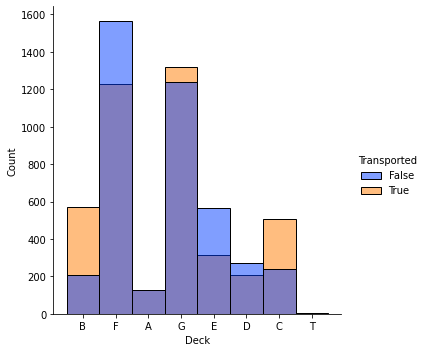

In [71]:
resumo(nave, 'Deck')

In [72]:
#sobre o deck, são ao todo 8 valores únicos, de A a G, com T.
#299 valores nulos
#com as maiores respostas em F, G e E.
#nota-se que, em B, F, G e C, foram os que tiveram as maiores quantidade de gente transportada
#Enquanto que A, ficou quase em 50/50 e em uma quantidade baixa, e E e D, também tiveram resultados favoravéis a não transportados.
#nesta senda, deck poderá entrar em features, tendo em vista que deck influenciou no transporte dos passageiros

Quantidade de valores únicos: 1894
Valores únicos: ['0' '1' '2' ... '1885' '1887' '1890']
Valores nulos: 299
Valores únicos: 
82      34
4       28
56      28
95      27
31      27
        ..
1848     1
1847     1
1846     1
1844     1
1890     1
Name: Numero, Length: 1894, dtype: int64


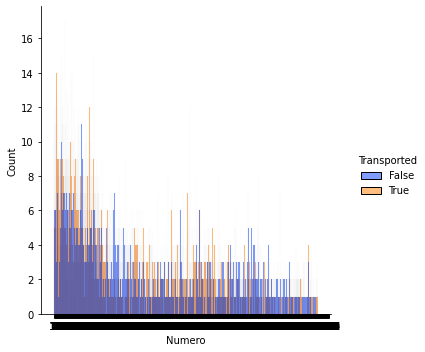

In [73]:
resumo(nave, "Numero")

In [74]:
#existe 1894 valores unicos, com 299 nulos.
#acredito que numeor NÃO entrará nas features.

Quantidade de valores únicos: 2
Valores únicos: ['P' 'S' nan]
Valores nulos: 299
Valores únicos: 
S    6381
P    6290
Name: Lado, dtype: int64


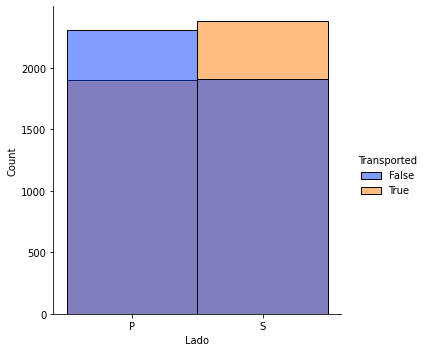

In [75]:
resumo(nave, 'Lado')

In [76]:
#ao todo são 2 valores unicos, bombordo(p) e estibordo (S)
#são 299 valores nulos
#divisão entre S e P, está equilibrada na frequencia.
#em relação aos transportados, nota-se claramente que S(estibordo) teve mais gente deslocada do que P(Bombordo)
#é uma boa inserir lado como features

# Somando as despesas/gastos

In [77]:
nave.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'Grupo', 'Deck', 'Numero', 'Lado'],
      dtype='object')

In [78]:
#as colunas a serem somadas são: roomservice, foodcourt, shoppingmall, spa, vrdeck.

In [79]:
nave.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Deck,Numero,Lado
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,0,S
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,A,0,S
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,0,S
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,1,S


In [80]:
nave['Despesas'] = nave['RoomService']+nave['FoodCourt']+nave['ShoppingMall']+nave['Spa']+nave['VRDeck']
nave

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P,0.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,F,0,S,736.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,A,0,S,10383.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,A,0,S,5176.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,1.0,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,2,G,1496,S,0.0
12966,Earth,0.0,TRAPPIST-1e,42.0,0.0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,1,NaN,NaN,NaN,1018.0
12967,Mars,1.0,55 Cancri e,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,1,D,296,P,0.0
12968,Europa,0.0,NaN,NaN,0.0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,1,D,297,P,3203.0


In [81]:
nave.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis = 1, inplace = True)

In [82]:
nave

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,False,1,B,0,P,0.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,Juanna Vines,True,1,F,0,S,736.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,Altark Susent,False,2,A,0,S,10383.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,Solam Susent,False,2,A,0,S,5176.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,Willy Santantines,True,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,1.0,TRAPPIST-1e,34.0,0.0,Jeron Peter,NaN,2,G,1496,S,0.0
12966,Earth,0.0,TRAPPIST-1e,42.0,0.0,Matty Scheron,NaN,1,NaN,NaN,NaN,1018.0
12967,Mars,1.0,55 Cancri e,NaN,0.0,Jayrin Pore,NaN,1,D,296,P,0.0
12968,Europa,0.0,NaN,NaN,0.0,Kitakan Conale,NaN,1,D,297,P,3203.0


In [83]:
nave['CryoSleep'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12965    False
12966    False
12967    False
12968    False
12969    False
Name: CryoSleep, Length: 12970, dtype: bool

Quantidade de valores únicos: 2680
Valores únicos: [    0.   736. 10383. ...  4990. 15375.  5478.]
Valores nulos: 1363
Valores únicos: 
0.0        4858
809.0        71
788.0        54
803.0        49
908.0        47
           ... 
1472.0        1
11737.0       1
1333.0        1
3370.0        1
5478.0        1
Name: Despesas, Length: 2680, dtype: int64


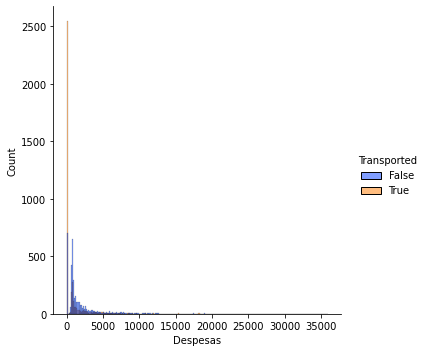

In [84]:
resumo(nave, 'Despesas', False)

In [85]:
#em relação as despesas, 2680 valores únicos, com 1363 sendo nulos.
#gasto mais comum foi de zero, com 4858 aparições.
#pelo gráfico, nota-se que quem não pagou teve forte tendência de ser transportado
#assim, vou incluir despesas na feature

# Ajustar as colunas para números visando facilitar o m.l.

In [86]:
nave.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,Europa,0.0,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,False,1,B,0,P,0.0
1,Earth,0.0,TRAPPIST-1e,24.0,0.0,Juanna Vines,True,1,F,0,S,736.0
2,Europa,0.0,TRAPPIST-1e,58.0,1.0,Altark Susent,False,2,A,0,S,10383.0
3,Europa,0.0,TRAPPIST-1e,33.0,0.0,Solam Susent,False,2,A,0,S,5176.0
4,Earth,0.0,TRAPPIST-1e,16.0,0.0,Willy Santantines,True,1,F,1,S,1091.0


In [87]:
#homeplanet
nave['HomePlanet'] = nave['HomePlanet'].replace({'Earth': 0, 'Mars': 1, 'Europa': 2})
nave

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,2.0,0.0,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,False,1,B,0,P,0.0
1,0.0,0.0,TRAPPIST-1e,24.0,0.0,Juanna Vines,True,1,F,0,S,736.0
2,2.0,0.0,TRAPPIST-1e,58.0,1.0,Altark Susent,False,2,A,0,S,10383.0
3,2.0,0.0,TRAPPIST-1e,33.0,0.0,Solam Susent,False,2,A,0,S,5176.0
4,0.0,0.0,TRAPPIST-1e,16.0,0.0,Willy Santantines,True,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.0,1.0,TRAPPIST-1e,34.0,0.0,Jeron Peter,NaN,2,G,1496,S,0.0
12966,0.0,0.0,TRAPPIST-1e,42.0,0.0,Matty Scheron,NaN,1,NaN,NaN,NaN,1018.0
12967,1.0,1.0,55 Cancri e,NaN,0.0,Jayrin Pore,NaN,1,D,296,P,0.0
12968,2.0,0.0,NaN,NaN,0.0,Kitakan Conale,NaN,1,D,297,P,3203.0


In [88]:
nave['Destination'] = nave['Destination'].replace({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2})
nave

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,2.0,0.0,0.0,39.0,0.0,Maham Ofracculy,False,1,B,0,P,0.0
1,0.0,0.0,0.0,24.0,0.0,Juanna Vines,True,1,F,0,S,736.0
2,2.0,0.0,0.0,58.0,1.0,Altark Susent,False,2,A,0,S,10383.0
3,2.0,0.0,0.0,33.0,0.0,Solam Susent,False,2,A,0,S,5176.0
4,0.0,0.0,0.0,16.0,0.0,Willy Santantines,True,1,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.0,1.0,0.0,34.0,0.0,Jeron Peter,NaN,2,G,1496,S,0.0
12966,0.0,0.0,0.0,42.0,0.0,Matty Scheron,NaN,1,NaN,NaN,NaN,1018.0
12967,1.0,1.0,1.0,NaN,0.0,Jayrin Pore,NaN,1,D,296,P,0.0
12968,2.0,0.0,NaN,NaN,0.0,Kitakan Conale,NaN,1,D,297,P,3203.0


In [89]:
nave['Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [90]:
nave['Deck'] = nave['Deck'].replace({'B': 1, 'F': 5, 'A': 0, 'G': 6, 'E': 4, 'D': 3, 'C': 2, 'T': 7})
nave.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,2.0,0.0,0.0,39.0,0.0,Maham Ofracculy,False,1,1.0,0,P,0.0
1,0.0,0.0,0.0,24.0,0.0,Juanna Vines,True,1,5.0,0,S,736.0
2,2.0,0.0,0.0,58.0,1.0,Altark Susent,False,2,0.0,0,S,10383.0
3,2.0,0.0,0.0,33.0,0.0,Solam Susent,False,2,0.0,0,S,5176.0
4,0.0,0.0,0.0,16.0,0.0,Willy Santantines,True,1,5.0,1,S,1091.0


In [91]:
nave['Lado'] = nave['Lado'].replace({'P': 0, 'S': 1})
nave

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,2.0,0.0,0.0,39.0,0.0,Maham Ofracculy,False,1,1.0,0,0.0,0.0
1,0.0,0.0,0.0,24.0,0.0,Juanna Vines,True,1,5.0,0,1.0,736.0
2,2.0,0.0,0.0,58.0,1.0,Altark Susent,False,2,0.0,0,1.0,10383.0
3,2.0,0.0,0.0,33.0,0.0,Solam Susent,False,2,0.0,0,1.0,5176.0
4,0.0,0.0,0.0,16.0,0.0,Willy Santantines,True,1,5.0,1,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.0,1.0,0.0,34.0,0.0,Jeron Peter,NaN,2,6.0,1496,1.0,0.0
12966,0.0,0.0,0.0,42.0,0.0,Matty Scheron,NaN,1,NaN,NaN,NaN,1018.0
12967,1.0,1.0,1.0,NaN,0.0,Jayrin Pore,NaN,1,3.0,296,0.0,0.0
12968,2.0,0.0,NaN,NaN,0.0,Kitakan Conale,NaN,1,3.0,297,0.0,3203.0


In [92]:
nave.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Name',
       'Transported', 'Grupo', 'Deck', 'Numero', 'Lado', 'Despesas'],
      dtype='object')

In [93]:
nave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   12682 non-null  float64
 1   CryoSleep    12660 non-null  float64
 2   Destination  12696 non-null  float64
 3   Age          12700 non-null  float64
 4   VIP          12674 non-null  float32
 5   Name         12676 non-null  object 
 6   Transported  8693 non-null   object 
 7   Grupo        12970 non-null  int64  
 8   Deck         12671 non-null  float64
 9   Numero       12671 non-null  object 
 10  Lado         12671 non-null  float64
 11  Despesas     11607 non-null  float64
dtypes: float32(1), float64(7), int64(1), object(3)
memory usage: 1.1+ MB


# Dropando colunas

In [94]:
#nave.drop('VIP', axis = 1, inplace = True)

In [95]:
#nave.drop('Destination', axis = 1, inplace = True)

In [96]:
#nave.drop('HomePlanet', axis = 1, inplace = True)

In [97]:
#nave.drop('Grupo', axis = 1, inplace = True)

In [98]:
#nave.drop('Lado', axis = 1, inplace = True)

# Ajustando coluna cryosleep e despesas

In [99]:
nave.groupby(['CryoSleep'])['Despesas'].mean()

CryoSleep
0.0    2297.55228
1.0       0.00000
Name: Despesas, dtype: float64

# Separando o df "nave" em train e test novamente

In [100]:
train_index = len(train)
train_index

8693

In [101]:
train = nave[:train_index]
train

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
0,2.0,0.0,0.0,39.0,0.0,Maham Ofracculy,False,1,1.0,0,0.0,0.0
1,0.0,0.0,0.0,24.0,0.0,Juanna Vines,True,1,5.0,0,1.0,736.0
2,2.0,0.0,0.0,58.0,1.0,Altark Susent,False,2,0.0,0,1.0,10383.0
3,2.0,0.0,0.0,33.0,0.0,Solam Susent,False,2,0.0,0,1.0,5176.0
4,0.0,0.0,0.0,16.0,0.0,Willy Santantines,True,1,5.0,1,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.0,0.0,1.0,41.0,1.0,Gravior Noxnuther,False,1,0.0,98,0.0,8536.0
8689,0.0,1.0,2.0,18.0,0.0,Kurta Mondalley,False,1,6.0,1499,1.0,0.0
8690,0.0,0.0,0.0,26.0,0.0,Fayey Connon,True,1,6.0,1500,1.0,1873.0
8691,2.0,0.0,1.0,32.0,0.0,Celeon Hontichre,False,2,4.0,608,1.0,4637.0


In [102]:
test_index = len(nave) - len(test)
test_index

8693

In [103]:
test = nave[test_index:]
test

,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Grupo,Deck,Numero,Lado,Despesas
8693,0.0,1.0,0.0,27.0,0.0,Nelly Carsoning,NaN,1,6.0,3,1.0,0.0
8694,0.0,0.0,0.0,19.0,0.0,Lerome Peckers,NaN,1,5.0,4,1.0,2832.0
8695,2.0,1.0,1.0,31.0,0.0,Sabih Unhearfus,NaN,1,2.0,0,1.0,0.0
8696,2.0,0.0,0.0,38.0,0.0,Meratz Caltilter,NaN,1,2.0,1,1.0,7418.0
8697,0.0,0.0,0.0,20.0,0.0,Brence Harperez,NaN,1,5.0,5,1.0,645.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,0.0,1.0,0.0,34.0,0.0,Jeron Peter,NaN,2,6.0,1496,1.0,0.0
12966,0.0,0.0,0.0,42.0,0.0,Matty Scheron,NaN,1,NaN,NaN,NaN,1018.0
12967,1.0,1.0,1.0,NaN,0.0,Jayrin Pore,NaN,1,3.0,296,0.0,0.0
12968,2.0,0.0,NaN,NaN,0.0,Kitakan Conale,NaN,1,3.0,297,0.0,3203.0


# Segunda Função - Testando Modelos

In [104]:
def automatico(df, teste, maquina):
  colunas = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age', 'Lado', 'Deck', 'Despesas', 'Grupo']
  X = df[colunas]
  y = df['Transported']
  #para corrigir o erro "Unknown label type: 'unknown'"
  y = y.astype(int)

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

  colunas_numericas = ['Age', 'Despesas']
  colunas_categoricas = ['HomePlanet', 'CryoSleep', 'Lado', 'Deck', 'Destination', 'VIP', 'Grupo']

  todas_colunas = colunas_numericas + colunas_categoricas
  X_train = X_train[todas_colunas].copy()
  X_valid = X_valid[todas_colunas].copy()
  X_test = teste[todas_colunas].copy()
  #imputar valores em colunas numericas

#ajustando os missing values
  X_train['CryoSleep'].fillna(0.0, inplace = True)
  X_valid['CryoSleep'].fillna(0.0, inplace = True)
  for c in X_train.index:
    if pd.isnull(X_train['Despesas'][c]):
      if X_train['CryoSleep'][c] == 0.0:
        X_train['Despesas'][c] = X_train['Despesas'].mean()
      else:
        X_train['Despesas'] = 0.0
    else:
      continue

  for c in X_valid.index:
    if pd.isnull(X_valid['Despesas'][c]):
      if X_valid['CryoSleep'][c] == 0.0:
        X_valid['Despesas'][c] = X_valid['Despesas'].mean()
      else:
        X_valid['Despesas'] = 0.0
    else:
      continue

  X_train['HomePlanet'].fillna(0.0, inplace = True)
  X_valid['HomePlanet'].fillna(0.0, inplace = True)

  X_train['Destination'].fillna(0.0, inplace = True)
  X_valid['Destination'].fillna(0.0, inplace = True)

  X_train['VIP'].fillna(0.0, inplace = True)
  X_valid['VIP'].fillna(0.0, inplace = True)



  for c in X_train.index:
    if pd.isnull(X_train['Deck'][c]):
      if X_train['HomePlanet'][c] == 0.0:
        X_train['Deck'][c] = 6
      elif X_train['HomePlanet'][c] == 1.0:
        X_train['Deck'][c] = 1
      elif X_train['HomePlanet'][c] == 2.0:
        X_train['Deck'][c] = 3
    else:
      continue

  for c in X_valid.index:
    if pd.isnull(X_valid['Deck'][c]):
      if X_valid['HomePlanet'][c] == 0.0:
        X_valid['Deck'][c] = 6
      elif X_valid['HomePlanet'][c] == 1.0:
        X_valid['Deck'][c] = 1
      elif X_valid['HomePlanet'][c] == 2.0:
        X_valid['Deck'][c] = 3
    else:
      continue

  for c in X_train.index:
    if pd.isnull(X_train['Lado'][c]):
      if X_train['HomePlanet'][c] == 0.0:
        X_train['Lado'][c] = 1.0
      elif X_train['HomePlanet'][c] == 2.0:
        X_train['Lado'][c] = 0.0
      elif X_train['HomePlanet'][c] == 1.0:
        X_train['Lado'][c] = 0.0
    else:
      continue


  for c in X_valid.index:
    if pd.isnull(X_valid['Lado'][c]):
      if X_valid['HomePlanet'][c] == 0.0:
        X_valid['Lado'][c] = 1.0
      elif X_valid['HomePlanet'][c] == 2.0:
        X_valid['Lado'][c] = 0.0
      elif X_valid['HomePlanet'][c] == 1.0:
        X_valid['Lado'][c] = 0.0
    else:
      continue

  imputacao = SimpleImputer(strategy = 'median')

  categoricos = Pipeline(steps=[
      ('imputacao', SimpleImputer(strategy='most_frequent')),
      ('one', OneHotEncoder(handle_unknown = 'ignore', sparse=False))
  ])

  preprocesso = ColumnTransformer(transformers = [
      ('numericos', imputacao, colunas_numericas),
      ('categoricas', categoricos, colunas_categoricas)
  ])

  modelo = maquina()

  ml = Pipeline(steps = [
      ('pre', preprocesso), ('ml', modelo)
  ])

  ml.fit(X_train, y_train)
  score_train = ml.score(X_train, y_train)
  print(f'Acurácia treino: {score_train * 100:.2f}%')

  score_valid = ml.score(X_valid, y_valid)
  print(f'Acurácia validação cruzada: {score_valid * 100:.2f}%')

  scores = cross_val_score(ml, X_train, y_train, cv = 5, scoring = 'accuracy')
  print(f'Média com validação cruzada: {scores.mean()}')
  print(f'Desvio padrão da validação cruzada:', scores.std() )

  predicao = ml.predict(X_valid)
  print('====Classification Report====')
  print(classification_report(y_valid, predicao))

  print('====Confusion Matrix====')
  print(confusion_matrix(y_valid, predicao))

  '''explainer = shap.TreeExplainer(ml)
  shap_values = explainer.shap_values(X_valid)
  shap.summary_plot(shap_values[1], X_valid)'''

  return score_train, score_valid

In [105]:
#logistic regression

acc_train, acc_valid = automatico(train, test, LogisticRegression)

Acurácia treino: 72.74%
Acurácia validação cruzada: 71.02%
Média com validação cruzada: 0.7244755338791513
Desvio padrão da validação cruzada: 0.004438274175836207
====Classification Report====
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       853
           1       0.76      0.64      0.69       886

    accuracy                           0.71      1739
   macro avg       0.72      0.71      0.71      1739
weighted avg       0.72      0.71      0.71      1739

====Confusion Matrix====
[[670 183]
 [321 565]]


In [106]:
#randomforest

acc_train_rf, acc_valid_rf = automatico(train, test, RandomForestClassifier)

Acurácia treino: 87.79%
Acurácia validação cruzada: 69.75%
Média com validação cruzada: 0.6767333681580976
Desvio padrão da validação cruzada: 0.010593600745650683
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       867
           1       0.71      0.67      0.69       872

    accuracy                           0.70      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.70      0.70      0.70      1739

====Confusion Matrix====
[[627 240]
 [286 586]]


In [107]:
#GaussianNb
acc_train_GaussianNB, acc_valid_GaussianNB = automatico(train, test, GaussianNB)

Acurácia treino: 69.90%
Acurácia validação cruzada: 69.52%
Média com validação cruzada: 0.6814808455176908
Desvio padrão da validação cruzada: 0.037390139779867104
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       870
           1       0.70      0.68      0.69       869

    accuracy                           0.70      1739
   macro avg       0.70      0.70      0.70      1739
weighted avg       0.70      0.70      0.70      1739

====Confusion Matrix====
[[621 249]
 [281 588]]


In [108]:
#linearsvc
acc_train_LinearSVC, acc_valid_LinearSVC = automatico(train, test, LinearSVC)

Acurácia treino: 71.99%
Acurácia validação cruzada: 73.32%
Média com validação cruzada: 0.6912593289854099
Desvio padrão da validação cruzada: 0.014574678411041589
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       888
           1       0.82      0.59      0.68       851

    accuracy                           0.73      1739
   macro avg       0.75      0.73      0.73      1739
weighted avg       0.75      0.73      0.73      1739

====Confusion Matrix====
[[776 112]
 [352 499]]


In [109]:
#adaboost
acc_train_AdaBoostClassifier, acc_valid_AdaBoostClassifier = automatico(train, test, AdaBoostClassifier)

Acurácia treino: 72.56%
Acurácia validação cruzada: 74.30%
Média com validação cruzada: 0.7221759616031115
Desvio padrão da validação cruzada: 0.006434326408598401
====Classification Report====
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       829
           1       0.80      0.68      0.74       910

    accuracy                           0.74      1739
   macro avg       0.75      0.75      0.74      1739
weighted avg       0.75      0.74      0.74      1739

====Confusion Matrix====
[[672 157]
 [290 620]]


In [110]:
#kneighbors
acc_train_KNeighborsClassifier, acc_valid_KNeighborsClassifier = automatico(train, test, KNeighborsClassifier)

Acurácia treino: 77.12%
Acurácia validação cruzada: 68.43%
Média com validação cruzada: 0.6803252150256789
Desvio padrão da validação cruzada: 0.01338970686388921
====Classification Report====
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       874
           1       0.69      0.66      0.67       865

    accuracy                           0.68      1739
   macro avg       0.68      0.68      0.68      1739
weighted avg       0.68      0.68      0.68      1739

====Confusion Matrix====
[[621 253]
 [296 569]]


In [111]:
#sgdc
acc_train_SGDClassifier, acc_valid_SGDClassifier = automatico(train, test, SGDClassifier)

Acurácia treino: 70.85%
Acurácia validação cruzada: 72.57%
Média com validação cruzada: 0.6403628671469725
Desvio padrão da validação cruzada: 0.08604491566892268
====Classification Report====
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       869
           1       0.87      0.53      0.66       870

    accuracy                           0.73      1739
   macro avg       0.77      0.73      0.71      1739
weighted avg       0.77      0.73      0.71      1739

====Confusion Matrix====
[[801  68]
 [409 461]]


In [112]:
#gradientboosting
acc_train_GradientBoostingClassifier, acc_valid_GradientBoostingClassifier = automatico(train, test, GradientBoostingClassifier)

Acurácia treino: 75.60%
Acurácia validação cruzada: 74.58%
Média com validação cruzada: 0.7405832975603701
Desvio padrão da validação cruzada: 0.010001645744772325
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       825
           1       0.83      0.66      0.73       914

    accuracy                           0.75      1739
   macro avg       0.76      0.75      0.75      1739
weighted avg       0.76      0.75      0.74      1739

====Confusion Matrix====
[[698 127]
 [315 599]]


In [113]:
acc_train_Xgboost, acc_valid_xgboost = automatico(train, test, XGBClassifier)

Acurácia treino: 74.99%
Acurácia validação cruzada: 73.78%
Média com validação cruzada: 0.7420190432844235
Desvio padrão da validação cruzada: 0.008617542152222539
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       870
           1       0.81      0.63      0.71       869

    accuracy                           0.74      1739
   macro avg       0.75      0.74      0.73      1739
weighted avg       0.75      0.74      0.73      1739

====Confusion Matrix====
[[738 132]
 [324 545]]


In [114]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Name',
       'Transported', 'Grupo', 'Deck', 'Numero', 'Lado', 'Despesas'],
      dtype='object')

# Modelo escolhido

In [115]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import eli5
from eli5.sklearn import PermutationImportance

In [117]:
colunas = ['HomePlanet', 'CryoSleep', 'Age', 'Lado', 'Deck', 'Despesas', 'Destination', 'VIP', 'Grupo']
X = train[colunas]
y = train['Transported']
#para corrigir o erro "Unknown label type: 'unknown'"
y = y.astype(int)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

colunas_numericas = ['Age', 'Despesas']
colunas_categoricas = ['HomePlanet', 'CryoSleep', 'Lado', 'Deck', 'Destination', 'VIP', 'Grupo']
todas_colunas = colunas_numericas + colunas_categoricas

X_train = X_train[todas_colunas].copy()
X_valid = X_valid[todas_colunas].copy()
X_test = test[todas_colunas].copy()

X_train['CryoSleep'].fillna(0.0, inplace = True)
X_valid['CryoSleep'].fillna(0.0, inplace = True)
for c in X_train.index:
 if pd.isnull(X_train['Despesas'][c]):
  if X_train['CryoSleep'][c] == 0.0:
    X_train['Despesas'][c] = X_train['Despesas'].mean()
  else:
    X_train['Despesas'] = 0.0
 else:
  continue

for c in X_valid.index:
 if pd.isnull(X_valid['Despesas'][c]):
   if X_valid['CryoSleep'][c] == 0.0:
     X_valid['Despesas'][c] = X_valid['Despesas'].mean()
   else:
     X_valid['Despesas'] = 0.0
 else:
   continue

X_train['HomePlanet'].fillna(0.0, inplace = True)
X_valid['HomePlanet'].fillna(0.0, inplace = True)

X_train['Destination'].fillna(0.0, inplace = True)
X_valid['Destination'].fillna(0.0, inplace = True)

X_train['VIP'].fillna(0.0, inplace = True)
X_valid['VIP'].fillna(0.0, inplace = True)



for c in X_train.index:
  if pd.isnull(X_train['Deck'][c]):
    if X_train['HomePlanet'][c] == 0.0:
      X_train['Deck'][c] = 6
    elif X_train['HomePlanet'][c] == 1.0:
      X_train['Deck'][c] = 1
    elif X_train['HomePlanet'][c] == 2.0:
      X_train['Deck'][c] = 3
  else:
    continue

for c in X_valid.index:
  if pd.isnull(X_valid['Deck'][c]):
    if X_valid['HomePlanet'][c] == 0.0:
      X_valid['Deck'][c] = 6
    elif X_valid['HomePlanet'][c] == 1.0:
      X_valid['Deck'][c] = 1
    elif X_valid['HomePlanet'][c] == 2.0:
      X_valid['Deck'][c] = 3
  else:
    continue

for c in X_train.index:
  if pd.isnull(X_train['Lado'][c]):
    if X_train['HomePlanet'][c] == 0.0:
      X_train['Lado'][c] = 1.0
    elif X_train['HomePlanet'][c] == 2.0:
      X_train['Lado'][c] = 0.0
    elif X_train['HomePlanet'][c] == 1.0:
      X_train['Lado'][c] = 0.0
  else:
    continue


for c in X_valid.index:
  if pd.isnull(X_valid['Lado'][c]):
    if X_valid['HomePlanet'][c] == 0.0:
      X_valid['Lado'][c] = 1.0
    elif X_valid['HomePlanet'][c] == 2.0:
      X_valid['Lado'][c] = 0.0
    elif X_valid['HomePlanet'][c] == 1.0:
      X_valid['Lado'][c] = 0.0
  else:
    continue

imputacao = SimpleImputer(strategy='median')

categorico = Pipeline(steps = [
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessamento = ColumnTransformer(transformers = [
    ('numero', imputacao, colunas_numericas),
    ('categorica', categorico, colunas_categoricas)
])

modelo = XGBClassifier()

ml = Pipeline(steps=[
    ('pre', preprocessamento),
    ('mol', modelo)
])

ml.fit(X_train, y_train)
score_train = ml.score(X_train, y_train)
print(f'Acurácia treino: {score_train*100:.2f}%')

score_valid = ml.score(X_valid, y_valid)
print(f'Acurácia validação cruzada:: {score_valid * 100:.2f}%')

scores = cross_val_score(ml, X_train, y_train, cv = 5, scoring='accuracy')
print(f'Média com validação cruzada: {scores.mean()}')
print(f'Desvio Padrão da validação cruzada:', scores.std())

predicao = ml.predict(X_valid)
print('====Classification Report====')
print(classification_report(y_valid, predicao))

print('====Confusion Matrix====')
print(confusion_matrix(y_valid, predicao))

permutacao = PermutationImportance(ml).fit(X_valid, y_valid)
eli5.show_weights(permutacao, feature_names = X_valid.columns.tolist())

Acurácia treino: 75.31%
Acurácia validação cruzada:: 73.38%
Média com validação cruzada: 0.7443203740386555
Desvio Padrão da validação cruzada: 0.005808758017647732
====Classification Report====
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       852
           1       0.80      0.63      0.71       887

    accuracy                           0.73      1739
   macro avg       0.75      0.74      0.73      1739
weighted avg       0.75      0.73      0.73      1739

====Confusion Matrix====
[[714 138]
 [325 562]]


Weight,Feature
0.1906 ± 0.0119,CryoSleep
0.0344 ± 0.0090,Age
0.0115 ± 0.0036,Deck
0.0093 ± 0.0042,Lado
0.0043 ± 0.0027,HomePlanet
0.0037 ± 0.0012,Destination
0.0016 ± 0.0017,Grupo
0 ± 0.0000,VIP
0 ± 0.0000,Despesas


In [118]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6954, 9), (1739, 9), (6954,), (1739,))

In [119]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 3741 to 8421
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1705 non-null   float64
 1   Despesas     1739 non-null   float64
 2   HomePlanet   1739 non-null   float64
 3   CryoSleep    1739 non-null   float64
 4   Lado         1739 non-null   float64
 5   Deck         1739 non-null   float64
 6   Destination  1739 non-null   float64
 7   VIP          1739 non-null   float32
 8   Grupo        1739 non-null   int64  
dtypes: float32(1), float64(7), int64(1)
memory usage: 193.6 KB


In [120]:
#erroproposital

In [121]:

X_test['CryoSleep'].fillna(0.0, inplace = True)

for c in X_test.index:
 if pd.isnull(X_test['Despesas'][c]):
  if X_test['CryoSleep'][c] == 0.0:
    X_test['Despesas'][c] = X_test['Despesas'].mean()
  else:
    X_test['Despesas'] = 0.0
 else:
  continue


X_test['HomePlanet'].fillna(0.0, inplace = True)


X_test['Destination'].fillna(0.0, inplace = True)

X_test['VIP'].fillna(0.0, inplace = True)




for c in X_test.index:
  if pd.isnull(X_test['Deck'][c]):
    if X_test['HomePlanet'][c] == 0.0:
      X_test['Deck'][c] = 6
    elif X_test['HomePlanet'][c] == 1.0:
      X_test['Deck'][c] = 1
    elif X_test['HomePlanet'][c] == 2.0:
      X_test['Deck'][c] = 3
  else:
    continue



for c in X_test.index:
  if pd.isnull(X_test['Lado'][c]):
    if X_test['HomePlanet'][c] == 0.0:
      X_test['Lado'][c] = 1.0
    elif X_test['HomePlanet'][c] == 2.0:
      X_test['Lado'][c] = 0.0
    elif X_test['HomePlanet'][c] == 1.0:
      X_test['Lado'][c] = 0.0
  else:
    continue




In [122]:
preds = ml.predict(X_test)
preds

array([1, 0, 1, ..., 1, 0, 1])

In [123]:
preds = preds.astype(str)
preds

array(['1', '0', '1', ..., '1', '0', '1'], dtype='<U21')

In [124]:
preds = np.char.replace(preds, '0', 'False')
preds

array(['1', 'False', '1', ..., '1', 'False', '1'], dtype='<U5')

In [125]:
preds = np.char.replace(preds, '1', 'True')
preds

array(['True', 'False', 'True', ..., 'True', 'False', 'True'], dtype='<U5')

In [126]:
submeter = pd.Series(preds, index = Passageiro['PassengerId'], name = 'Transported')
submeter

PassengerId
0013_01     True
0018_01    False
0019_01     True
0021_01     True
0023_01    False
           ...  
9266_02     True
9269_01    False
9271_01     True
9273_01    False
9277_01     True
Name: Transported, Length: 4277, dtype: object

In [127]:
submeter.to_csv('001_10janeiroTitanic.csv')

In [128]:
!head -n10 001_10janeiroTitanic.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


In [129]:
'''parametros = dict(
    max_depth = [n for n in range(1,5)],
    min_samples_split = [n for n in range(2, 6)],
    min_samples_leaf = [n for n in range(2, 6)],
    n_estimators = [n for n in range(10, 200, 10)]
)'''

'parametros = dict(\n    max_depth = [n for n in range(1,5)],\n    min_samples_split = [n for n in range(2, 6)],\n    min_samples_leaf = [n for n in range(2, 6)],\n    n_estimators = [n for n in range(10, 200, 10)]\n)'

In [130]:
#gbc = RandomForestClassifier()

In [131]:
#from sklearn.model_selection import GridSearchCV

In [132]:
#gbc_vvv = GridSearchCV(estimator = gbc, param_grid = parametros, cv = 5)

In [133]:
#X.fillna(X.mean(), inplace = True)

In [134]:
#gbc_vvv.fit(X, y)

In [135]:
'''print(f'Melhor pontuação: {gbc_vvv.best_score_: 2f}')
print(f'Melhores parâmetros: {gbc_vvv.best_estimator_}')'''

"print(f'Melhor pontuação: {gbc_vvv.best_score_: 2f}')\nprint(f'Melhores parâmetros: {gbc_vvv.best_estimator_}')"

In [136]:
#X_test.fillna(X_test.mean(), inplace = True)

In [137]:
'''predicao_com_x_test = gbc_vvv.predict(X_test)
predicao_com_x_test'''

'predicao_com_x_test = gbc_vvv.predict(X_test)\npredicao_com_x_test'

In [138]:
#Melhor pontuação:  0.740139
#Melhores parâmetros: RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=40)